# Plot programs

In [131]:
#3d plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
x=[1,2,3,4]
y=[5,7,10,12]

In [133]:
X,Y = np.meshgrid(x,y)

In [134]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [135]:
Y

array([[ 5,  5,  5,  5],
       [ 7,  7,  7,  7],
       [10, 10, 10, 10],
       [12, 12, 12, 12]])

In [136]:
def z_function(x,y):
    return np.sin(np.sqrt(x**2+y**2))

In [137]:
Z = z_function(X,Y)
Z

array([[-0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.70886129,  0.83980535,  0.97176225,  0.97838882],
       [-0.58517647, -0.69847269, -0.84975931, -0.97473949],
       [-0.50101919, -0.39019701, -0.19578094,  0.08264565]])

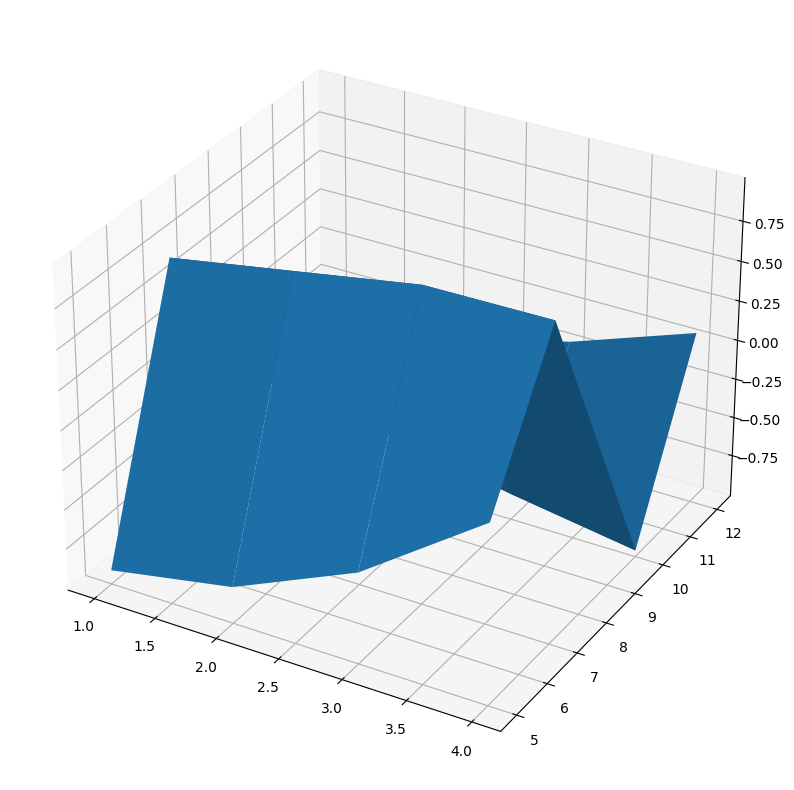

In [138]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

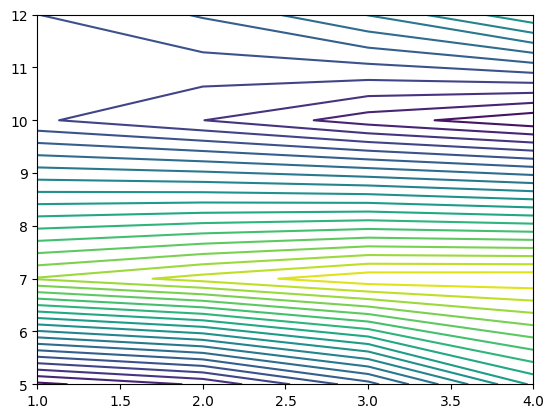

In [139]:
#contour plot
plt.contour(X,Y,Z,20)
plt.show()

In [140]:
#heatmap plot
import seaborn as sns

In [141]:
df = pd.DataFrame(data=np.random.randint(0,100,size=(50,4)),columns=['A','B','C','D'])

In [142]:
corr = df.corr()

<Axes: >

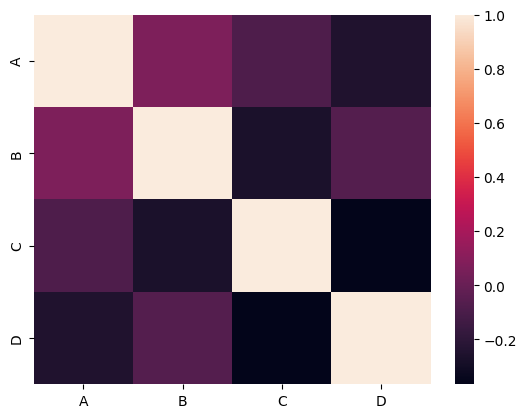

In [143]:
sns.heatmap(corr)

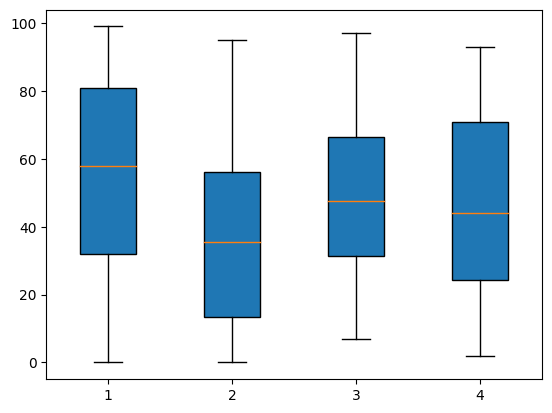

In [144]:
#boxplot
plt.boxplot(df,patch_artist=True)
plt.show()

# Naive Bayes classifier on Titanic dataset

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [146]:
raw_data = pd.read_csv('titanic.csv')
raw_data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [147]:
#drop unnecessary columns
data = raw_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [148]:
#check for missing values
mv = data.isnull().sum()
mv

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [149]:
#remove missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Pclass,Sex,Age,Fare,Survived
count,714.000000,714,714.000000,714.000000,714.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN
freq,NaN,453,NaN,NaN,NaN
mean,2.236695,NaN,29.699118,34.694514,0.406162
std,0.838250,NaN,14.526497,52.918930,0.491460
min,1.000000,NaN,0.420000,0.000000,0.000000
25%,1.000000,NaN,20.125000,8.050000,0.000000
50%,2.000000,NaN,28.000000,15.741700,0.000000
75%,3.000000,NaN,38.000000,33.375000,1.000000


In [150]:
#convert sex values to 0 and 1 using pd.get_dummies()
data_dummies = pd.get_dummies(data_no_mv, drop_first=True)
data_dummies.head()

,Pclass,Age,Fare,Survived,Sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,7.9250,1,False
3,1,35.0,53.1000,1,False
4,3,35.0,8.0500,0,True


In [151]:
#let label=Survived and features=dropped(Fare and Survived)
label = data_dummies['Survived']
features = data_dummies.drop(['Fare','Survived'],axis='columns')

In [152]:
#split data into Train and test in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=1)

In [153]:
#Build Model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [154]:
#Find Predict and Accuracy
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [155]:
#Confusion matrix
matrix = pd.DataFrame(confusion_matrix(y_test, pred),
                      columns=['Predict 0','Predict 1'],
                      index=['Actual 0','Actual 1'])
matrix

,Predict 0,Predict 1
Actual 0,74,12
Actual 1,21,36


In [156]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.75      0.63      0.69        57

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143



# KNN Classifier with Euclidean distance (Glass dataset)

In [157]:
import numpy as np
import pandas as pd

In [158]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [159]:
#split into train test
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass, test_size=0.3, random_state=0)

In [160]:
#import KNN and build the model with k=3
from sklearn.neighbors import KNeighborsClassifier as KNC

neigh=KNC(n_neighbors=3)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])

pred_train = neigh.predict(train.iloc[:,0:9])
acc_train = np.mean(pred_train==train.iloc[:,9])
acc_train

0.8456375838926175

In [161]:
pred_test = neigh.predict(test.iloc[:,0:9])
acc_test = np.mean(pred_test==test.iloc[:,9])
acc_test

0.6461538461538462

# Unsupervised KMeans Clustering on Iris dataset

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [163]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [164]:
df.drop(['Id'],axis=1,inplace=True)  #drop Id column

In [165]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
df.isnull().sum() #check for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [167]:
df.nunique() #check for unique values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [168]:
df['PetalLengthCm'].unique() #show Unique values of specific column

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [169]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

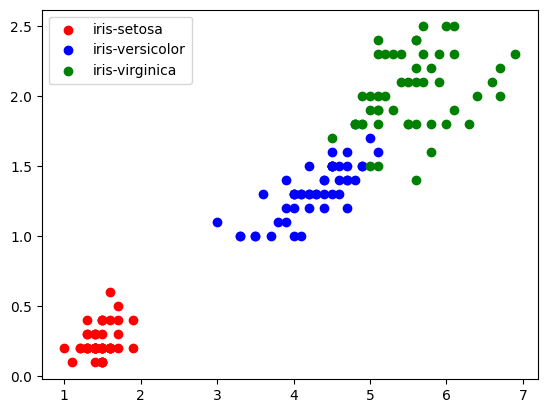

In [170]:
df1 = df[df['Species']=='Iris-setosa']
df2 = df[df['Species']=='Iris-versicolor']
df3 = df[df['Species']=='Iris-virginica']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='r', label='iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color='b', label='iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color='g', label='iris-virginica')

plt.legend()
plt.show()

In [171]:
#Import and build Kmeans Clustering
from sklearn.cluster import KMeans

df_imp = df.iloc[:,0:4]
k_meansclus = range(1,10)
sse=[]

for k in k_meansclus:
    km = KMeans(n_clusters=k)
    km.fit(df_imp)
    sse.append(km.inertia_) 
    
sse

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.34540931571816,
 46.535582051282056,
 38.964787851037855,
 34.196982162574265,
 29.914633449883457,
 27.83057575757576]

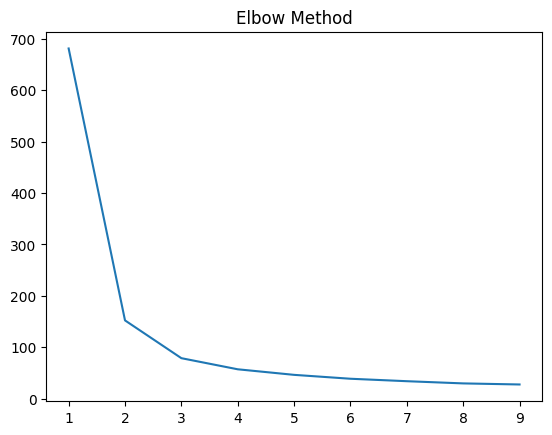

In [172]:
#Elbow method Plot
plt.title('Elbow Method')
plt.plot(k_meansclus, sse)
plt.show()

In [173]:
#Convert the data into 3 different types of clusters
km1 = KMeans(n_clusters=3, max_iter=300, random_state=0)
km1.fit(df_imp)

y_means = km1.fit_predict(df_imp)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [176]:
#CONVERT df_imp to array (VERY IMPORTANT)
df_imp = np.array(df_imp)
df_imp

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

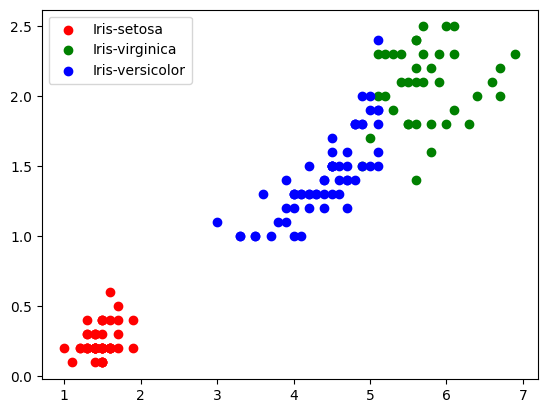

In [177]:
#plt scatter df_imp[y_means==x,2] and df_imp[y_means==x,3] for each Species

plt.scatter(df_imp[y_means==1,2],df_imp[y_means==1,3], color='r', label='Iris-setosa')
plt.scatter(df_imp[y_means==2,2],df_imp[y_means==2,3], color='g', label='Iris-virginica')
plt.scatter(df_imp[y_means==0,2],df_imp[y_means==0,3], color='b', label='Iris-versicolor')

plt.legend()
plt.show()

# GRAPH REPRESENTAIONS PROGRAMS FOR Toyota.csv

In [49]:
#3d surface plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
toyota = pd.read_csv('Toyota.csv')
x = toyota['Price']
y = toyota['Age']

In [51]:
X,Y=np.meshgrid(x,y)

In [52]:
def z_function(x,y):
    return np.cos(np.log(x**2+y**2))

In [53]:
Z = z_function(X,Y)

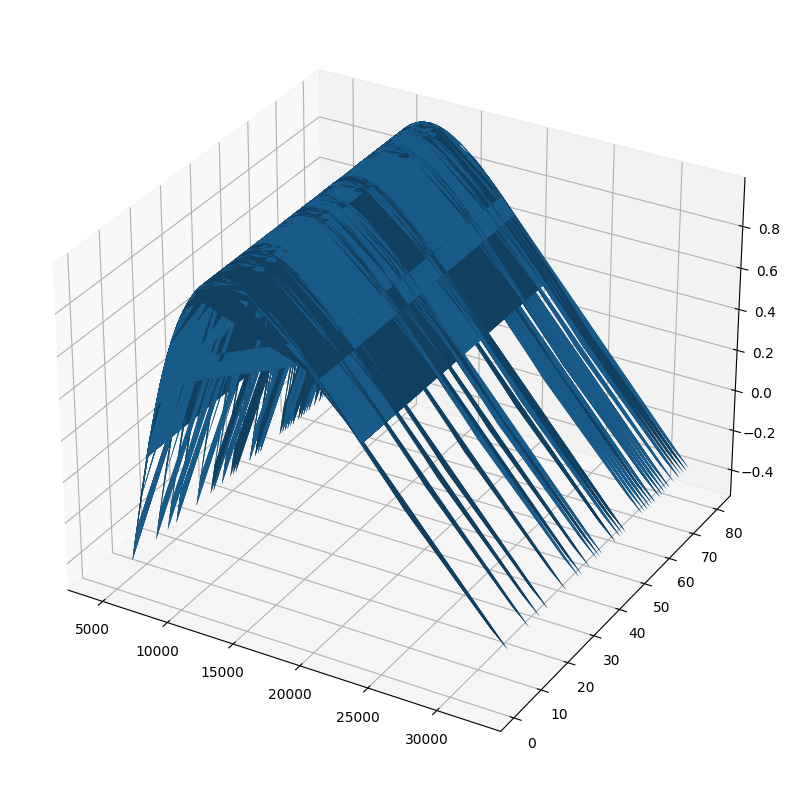

In [54]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

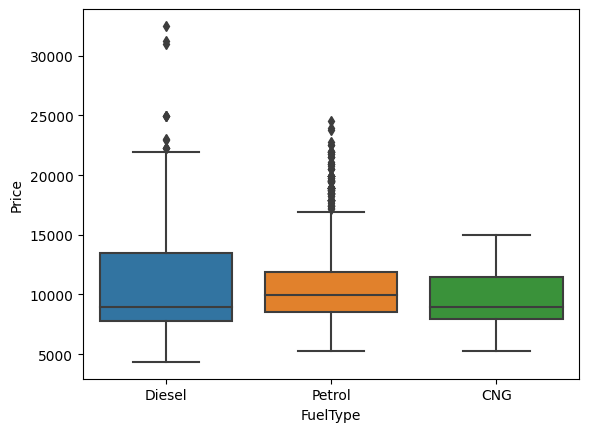

In [66]:
#boxplot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('Toyota.csv').dropna()
fueltype = data['FuelType'].unique

sns.boxplot(x=data['FuelType'],y=data['Price'])
plt.show()

# BFS Algorithm

In [67]:
graph = {
    '5': ['3','7'],
    '3': ['2','4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

visited=[]
queue=[]

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    
    while queue:
        m = queue.pop(0)
        print(m, end=" ")
        
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

bfs(visited,graph,'5')

5 3 7 2 4 8 

# MIN-MAX algorithm

In [4]:
import math

def minmax(curDepth,targetDepth,nodeIndex,maxTurn,score):
    if curDepth==targetDepth:
        return score[nodeIndex]

    if maxTurn:
        return max(
                minmax(curDepth+1,targetDepth,nodeIndex * 2,False,score),  
                minmax(curDepth+1,targetDepth,nodeIndex * 2 +1,False,score)
              )
    else:
        return min(
               minmax(curDepth+1,targetDepth,nodeIndex * 2,True,score),  
               minmax(curDepth+1,targetDepth,nodeIndex * 2 +1,True,score) 
              )

score=[1,2,3,4,5,6,7,8]
treeDepth = math.log2(len(score))

print("The optimal value is:", minmax(0,treeDepth,0,True,score))

The optimal value is: 6
